In [1]:
import os

os.getcwd()

In [2]:
# import packages (data)

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import logit, ols, glm
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter

In [3]:
## New York data (September 08 / 2021 )
df = pd.read_csv("listings_NY.csv")
df.shape

(36923, 74)

In [4]:
# To get all the column names

my_list = list(df)
# my_list

In [5]:
variables = [
 'review_scores_rating',
    
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'calculated_host_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'review_scores_accuracy',   
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'instant_bookable',
]

# host_since : must convert to categorical but it's really hard (cuz date is continuous)
# amenities -> association..?

In [6]:
# select columns
df_select = df[variables]
df_select.shape

(36923, 14)

In [7]:
# host about

df_select.loc[:,"host_about"][~df_select.loc[:, "host_about"].isnull()] = "t" # not nan
df_select.loc[:,"host_about"][df_select.loc[:, "host_about"].isnull()] = "f"   # nan

<ipython-input-7-3fccc81da416>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.loc[:,"host_about"][~df_select.loc[:, "host_about"].isnull()] = "t" # not nan
C:\Anaconda3\envs\Py38\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
<ipython-input-7-3fccc81da416>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.loc[:,"host_about"][df_select

In [8]:
# host resposne time


In [9]:
# convert host response rate to float

df_select['host_response_rate'] = df_select['host_response_rate'].str.replace('%', '')
df_select['host_response_rate'] = df_select['host_response_rate'].astype(float)
df_select['host_response_rate'] = df_select['host_response_rate']/100

<ipython-input-9-42bc775c7c26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['host_response_rate'] = df_select['host_response_rate'].str.replace('%', '')
<ipython-input-9-42bc775c7c26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['host_response_rate'] = df_select['host_response_rate'].astype(float)
<ipython-input-9-42bc775c7c26>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [10]:
# convert host acceptance rate to float

df_select['host_acceptance_rate'] = df_select['host_acceptance_rate'].str.replace('%', '')
df_select['host_acceptance_rate'] = df_select['host_acceptance_rate'].astype(float)
df_select['host_acceptance_rate'] = df_select['host_acceptance_rate']/100

<ipython-input-10-0728e2f799eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['host_acceptance_rate'] = df_select['host_acceptance_rate'].str.replace('%', '')
<ipython-input-10-0728e2f799eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['host_acceptance_rate'] = df_select['host_acceptance_rate'].astype(float)
<ipython-input-10-0728e2f799eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [11]:
#count NaN Values
#sum([True for idx, row in df_select.iterrows() if any(row.isnull())])

# delete NaN Values
df_clean = df_select.dropna()

In [12]:
df_clean["review_scores_rating"].describe()

count    15431.000000
mean         4.676151
std          0.513956
min          1.000000
25%          4.600000
50%          4.820000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

In [13]:
review_score = df_clean["review_scores_rating"]

In [14]:
# use mean percentile(4.676151) to split review scores
df_clean["review_scores_rating"] = pd.cut(df_clean.review_scores_rating, bins=[0,df_clean["review_scores_rating"].mean(),5],labels=['low','high'])

<ipython-input-14-69fcc7b135fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["review_scores_rating"] = pd.cut(df_clean.review_scores_rating, bins=[0,df_clean["review_scores_rating"].mean(),5],labels=['low','high'])


In [15]:
df_new = df_clean[["review_scores_rating", "host_about", "host_response_time",
                   "host_response_rate", "host_acceptance_rate",
                   "host_is_superhost", "calculated_host_listings_count",
                   "host_has_profile_pic","host_identity_verified",
                   'review_scores_accuracy', 'review_scores_cleanliness',
                   'review_scores_checkin','review_scores_communication',
                   "instant_bookable"]]

# Exploratory Visualizations

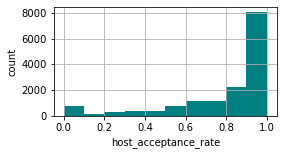

In [16]:
#host acceptance rate
plt.figure(figsize=(4,2))
df_new.host_acceptance_rate.hist(color='teal')
plt.ylabel('count')
plt.xlabel('host_acceptance_rate')
plt.show()

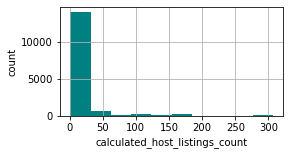

In [17]:
#host listings count
plt.figure(figsize=(4,2))
df_new.calculated_host_listings_count.hist(color='teal')
plt.ylabel('count')
plt.xlabel('calculated_host_listings_count')
plt.show()

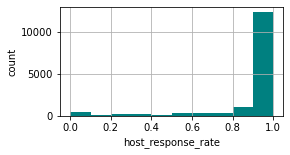

In [18]:
#host response rate
plt.figure(figsize=(4,2))
df_new.host_response_rate.hist(color='teal')
plt.ylabel('count')
plt.xlabel('host_response_rate')
plt.show()

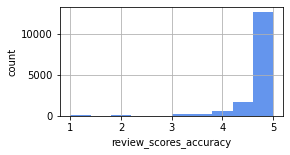

In [19]:
#review scores accuracy
plt.figure(figsize=(4,2))
df_new.review_scores_accuracy.hist(color='cornflowerblue')
plt.ylabel('count')
plt.xlabel('review_scores_accuracy')
plt.show()

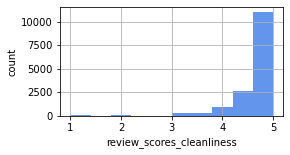

In [20]:
#review scores cleanliness
plt.figure(figsize=(4,2))
df_new.review_scores_cleanliness.hist(color='cornflowerblue')
plt.ylabel('count')
plt.xlabel('review_scores_cleanliness')
plt.show()

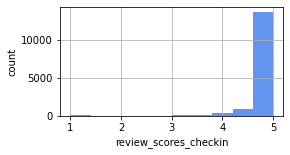

In [21]:
#review scores checkin
plt.figure(figsize=(4,2))
df_new.review_scores_checkin.hist(color='cornflowerblue')
plt.ylabel('count')
plt.xlabel('review_scores_checkin')
plt.show()

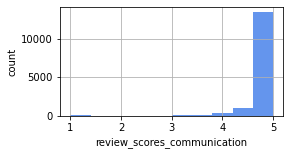

In [22]:
#review scores communication
plt.figure(figsize=(4,2))
df_new.review_scores_communication.hist(color='cornflowerblue')
plt.ylabel('count')
plt.xlabel('review_scores_communication')
plt.show()

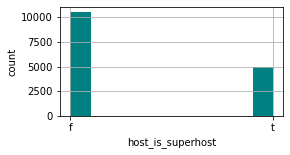

In [23]:
#superhost
plt.figure(figsize=(4,2))
df_new.host_is_superhost.hist(color='teal')
plt.ylabel('count')
plt.xlabel('host_is_superhost')
plt.show()

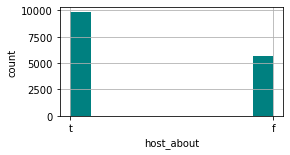

In [24]:
#host about
plt.figure(figsize=(4,2))
df_new.host_about.hist(color='teal')
plt.ylabel('count')
plt.xlabel('host_about')
plt.show()

In [25]:
df_new.to_csv('Final_ML.csv', index = False)

In [26]:
# logistic regression

In [27]:
# convert review_scores_rating to 0, 1

df_new['review_scores_rating'] = df_new['review_scores_rating'].replace(('high','low'),("1","0"))
df_new['review_scores_rating'] = df_new['review_scores_rating'].astype(float)
df_new.value_counts("review_scores_rating")

review_scores_rating
1.0    10475
0.0     4956
dtype: int64

In [28]:
# split dataset to training and test (randomly)

# Creating a dataframe with 80% values of original dataframe
#part_80 = df_new.sample(frac = 0.8)
 
# Creating dataframe with rest of the 20% values
#rest_part_20 = df_new.drop(part_80.index)

In [29]:
# split dataset to training and test (ordinal)
part_70 = df_new.iloc[:int(len(df_new)*(70/100))]
rest_part_30 = df_new.drop(part_70.index)

In [30]:
# run logistic regression (training set)

model = logit("review_scores_rating ~ \
 host_about +\
 host_response_rate +\
 host_acceptance_rate +\
 host_is_superhost +\
 calculated_host_listings_count+\
 review_scores_accuracy+\
 review_scores_cleanliness+\
 review_scores_checkin +\
 review_scores_communication", part_70).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.303957
         Iterations 8
                            Logit Regression Results                            
Dep. Variable:     review_scores_rating   No. Observations:                10801
Model:                            Logit   Df Residuals:                    10791
Method:                             MLE   Df Model:                            9
Date:                  Fri, 22 Jul 2022   Pseudo R-squ.:                  0.5118
Time:                          16:09:43   Log-Likelihood:                -3283.0
converged:                         True   LL-Null:                       -6724.6
Covariance Type:              nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -66.6386      1.537

In [31]:
# statistically significant variables

# host_is_superhost[T.t] 
# host_acceptance_rate
# review_scores_accuracy
# review_scores_cleanliness
# review_scores_checkin
# review_scores_communication

In [32]:
# run logistic regression (only statistically significant variables)

model = logit("review_scores_rating ~ \
 host_acceptance_rate +\
 host_is_superhost +\
 review_scores_accuracy+\
 review_scores_cleanliness+\
 review_scores_checkin +\
 review_scores_communication", part_70).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.304038
         Iterations 8
                            Logit Regression Results                            
Dep. Variable:     review_scores_rating   No. Observations:                10801
Model:                            Logit   Df Residuals:                    10794
Method:                             MLE   Df Model:                            6
Date:                  Fri, 22 Jul 2022   Pseudo R-squ.:                  0.5117
Time:                          16:09:43   Log-Likelihood:                -3283.9
converged:                         True   LL-Null:                       -6724.6
Covariance Type:              nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -66.6105      1.536    -43.3

In [33]:
# apply to test set

model = logit("review_scores_rating ~ \
 host_is_superhost +\
 host_acceptance_rate +\
 review_scores_accuracy+\
 review_scores_cleanliness+\
 review_scores_checkin+\
 review_scores_communication", rest_part_30).fit()

print(model.summary())

# result look good

Optimization terminated successfully.
         Current function value: 0.317383
         Iterations 8
                            Logit Regression Results                            
Dep. Variable:     review_scores_rating   No. Observations:                 4630
Model:                            Logit   Df Residuals:                     4623
Method:                             MLE   Df Model:                            6
Date:                  Fri, 22 Jul 2022   Pseudo R-squ.:                  0.5033
Time:                          16:09:43   Log-Likelihood:                -1469.5
converged:                         True   LL-Null:                       -2958.5
Covariance Type:              nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -37.4282      1.382    -27.0

In [34]:
# pre-processing (gini impurity)

In [35]:
# convert review scores rating to float again

df_clean["review_scores_rating"] = review_score

<ipython-input-35-306c39864f91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["review_scores_rating"] = review_score


In [36]:
df_clean.host_response_rate.count()

15431

In [37]:
df_clean.review_scores_rating

0        4.70
1        4.46
3        5.00
4        4.21
6        4.70
         ... 
36735    5.00
36736    5.00
36762    5.00
36776    5.00
36854    3.00
Name: review_scores_rating, Length: 15431, dtype: float64

In [38]:
# set standard to calculate gini impurity index

df_clean["host_response_rate"] = pd.cut(df_clean.host_response_rate, 
                                        bins=[0,df_clean["host_response_rate"].mean(),1],
                                        labels=['low','high'],include_lowest=True)

df_clean["host_acceptance_rate"] = pd.cut(df_clean.host_acceptance_rate,
                                          bins=[0,df_clean["host_acceptance_rate"].mean(),1],
                                          labels=['low','high'],include_lowest=True)

df_clean["calculated_host_listings_count"] = pd.cut(df_clean.calculated_host_listings_count,
                                                    bins=[0,1,500],
                                                    labels=['one','one more'])

df_clean["review_scores_accuracy"] = pd.cut(df_clean.review_scores_accuracy,
                                            bins=[0,df_clean["review_scores_accuracy"].mean(),5],
                                            labels=['low','high'])

df_clean["review_scores_cleanliness"] = pd.cut(df_clean.review_scores_cleanliness, 
                                               bins=[0,df_clean["review_scores_cleanliness"].mean(),5],
                                               labels=['low','high'])

df_clean["review_scores_checkin"] = pd.cut(df_clean.review_scores_checkin, 
                                           bins=[0,df_clean["review_scores_checkin"].mean(),5],
                                           labels=['low','high'])

df_clean["review_scores_communication"] = pd.cut(df_clean.review_scores_communication, 
                                                 bins=[0,df_clean["review_scores_communication"].mean(),5],
                                                 labels=['low','high'])

<ipython-input-38-29499bc6191d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["host_response_rate"] = pd.cut(df_clean.host_response_rate,
<ipython-input-38-29499bc6191d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["host_acceptance_rate"] = pd.cut(df_clean.host_acceptance_rate,
<ipython-input-38-29499bc6191d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [39]:
df_clean.host_response_rate.count()

15431

In [40]:
# host_about

df_t = df_clean[df_clean.host_about == "t"].review_scores_rating
p_t_t = df_t[df_t > df_clean["review_scores_rating"].mean()].count()/df_t.count()
p_t_f = 1-p_t_t
gini_impurity_t = 1-((p_t_t**2)+(p_t_f**2))
    
df_f = df_clean[df_clean.host_about == "f"].review_scores_rating
p_f_t = df_f[df_f > df_clean["review_scores_rating"].mean()].count()/df_f.count()
p_f_f = 1-p_f_t
gini_impurity_f = 1-((p_f_t**2)+(p_f_f**2))
    
weighted_gini_impurity = gini_impurity_t * df_t.count()/df_clean.host_about.count()+ gini_impurity_f * df_f.count()/df_clean.host_about.count()
host_about = weighted_gini_impurity

In [41]:
# superhost
df_t = df_clean[df_clean.host_is_superhost == "t"].review_scores_rating
p_t_t = df_t[df_t > df_clean["review_scores_rating"].mean()].count()/df_t.count()
p_t_f = 1-p_t_t
gini_impurity_t = 1-((p_t_t**2)+(p_t_f**2))
    
df_f = df_clean[df_clean.host_is_superhost == "f"].review_scores_rating
p_f_t = df_f[df_f > df_clean["review_scores_rating"].mean()].count()/df_f.count()
p_f_f = 1-p_f_t
gini_impurity_f = 1-((p_f_t**2)+(p_f_f**2))
    
weighted_gini_impurity = gini_impurity_t * df_t.count()/df_clean.host_is_superhost.count()+ gini_impurity_f * df_f.count()/df_clean.host_is_superhost.count()
host_is_superhost = weighted_gini_impurity

In [42]:
# host has profile pic

df_t = df_clean[df_clean.host_has_profile_pic == "t"].review_scores_rating
p_t_t = df_t[df_t >df_clean["review_scores_rating"].mean()].count()/df_t.count()
p_t_f = 1-p_t_t
gini_impurity_t = 1-((p_t_t**2)+(p_t_f**2))
    
df_f = df_clean[df_clean.host_has_profile_pic == "f"].review_scores_rating
p_f_t = df_f[df_f > df_clean["review_scores_rating"].mean()].count()/df_f.count()
p_f_f = 1-p_f_t
gini_impurity_f = 1-((p_f_t**2)+(p_f_f**2))
    
weighted_gini_impurity = gini_impurity_t * df_t.count()/df_clean.host_has_profile_pic.count() + gini_impurity_f * df_f.count()/df_clean.host_has_profile_pic.count()
host_has_profile_pic = weighted_gini_impurity

In [43]:
# host_identity_verified
df_t = df_clean[df_clean.host_identity_verified == "t"].review_scores_rating
p_t_t = df_t[df_t > df_clean["review_scores_rating"].mean()].count()/df_t.count()
p_t_f = 1-p_t_t
gini_impurity_t = 1-((p_t_t**2)+(p_t_f**2))

df_f = df_clean[df_clean.host_identity_verified == "f"].review_scores_rating
p_f_t = df_f[df_f > df_clean["review_scores_rating"].mean()].count()/df_f.count()
p_f_f = 1-p_f_t
gini_impurity_f = 1-((p_f_t**2)+(p_f_f**2))
    
weighted_gini_impurity = gini_impurity_t * df_t.count()/df_clean.host_identity_verified.count() + gini_impurity_f * df_f.count()/df_clean.host_identity_verified.count()
host_identity_verified = weighted_gini_impurity

In [44]:
# instant_bookable

df_t = df_clean[df_clean.instant_bookable == "t"].review_scores_rating
p_t_t = df_t[df_t > df_clean["review_scores_rating"].mean()].count()/df_t.count()
p_t_f = 1-p_t_t
gini_impurity_t = 1-((p_t_t**2)+(p_t_f**2))
    
df_f = df_clean[df_clean.instant_bookable == "f"].review_scores_rating
p_f_t = df_f[df_f > df_clean["review_scores_rating"].mean()].count()/df_f.count()
p_f_f = 1-p_f_t
gini_impurity_f = 1-((p_f_t**2)+(p_f_f**2))
    
weighted_gini_impurity = gini_impurity_t * df_t.count()/df_clean.instant_bookable.count() + gini_impurity_f * df_f.count()/df_clean.instant_bookable.count()
instant_bookable = weighted_gini_impurity

In [45]:
# host_response_rate   
    
df_t = df_clean[df_clean.host_response_rate == "high"].review_scores_rating
p_t_t = df_t[df_t > df_clean["review_scores_rating"].mean()].count()/df_t.count()
p_t_f = 1-p_t_t
gini_impurity_t = 1-((p_t_t**2)+(p_t_f**2))
    
df_f = df_clean[df_clean.host_response_rate == "high"].review_scores_rating
p_f_t = df_f[df_f > df_clean["review_scores_rating"].mean()].count()/df_f.count()
p_f_f = 1-p_f_t
gini_impurity_f = 1-((p_f_t**2)+(p_f_f**2))
    
weighted_gini_impurity = gini_impurity_t * df_t.count()/df_clean.host_response_rate.count() + gini_impurity_f * df_f.count()/df_clean.host_response_rate.count()
host_response_rate = weighted_gini_impurity

In [46]:
# host_acceptance_rate
    
df_t = df_clean[df_clean.host_acceptance_rate == "high"].review_scores_rating
p_t_t = df_t[df_t > df_clean["review_scores_rating"].mean()].count()/df_t.count()
p_t_f = 1-p_t_t
gini_impurity_t = 1-((p_t_t**2)+(p_t_f**2))
    
df_f = df_clean[df_clean.host_acceptance_rate == "high"].review_scores_rating
p_f_t = df_f[df_f > df_clean["review_scores_rating"].mean()].count()/df_f.count()
p_f_f = 1-p_f_t
gini_impurity_f = 1-((p_f_t**2)+(p_f_f**2))
    
weighted_gini_impurity = gini_impurity_t * df_t.count()/df_clean.host_acceptance_rate.count() + gini_impurity_f * df_f.count()/df_clean.host_acceptance_rate.count()
host_acceptance_rate = weighted_gini_impurity    

In [47]:
# review_scores_accuracy
    
df_t = df_clean[df_clean.review_scores_accuracy == "high"].review_scores_rating
p_t_t = df_t[df_t >df_clean["review_scores_rating"].mean()].count()/df_t.count()
p_t_f = 1-p_t_t
gini_impurity_t = 1-((p_t_t**2)+(p_t_f**2))
    
df_f = df_clean[df_clean.review_scores_accuracy == "high"].review_scores_rating
p_f_t = df_f[df_f > df_clean["review_scores_rating"].mean()].count()/df_f.count()
p_f_f = 1-p_f_t
gini_impurity_f = 1-((p_f_t**2)+(p_f_f**2))
    
weighted_gini_impurity = gini_impurity_t * df_t.count()/df_clean.review_scores_accuracy.count() + gini_impurity_f * df_f.count()/df_clean.review_scores_accuracy.count()
review_scores_accuracy = weighted_gini_impurity    

In [48]:
# review_scores_cleanliness    
    
df_t = df_clean[df_clean.review_scores_cleanliness == "high"].review_scores_rating
p_t_t = df_t[df_t > df_clean["review_scores_rating"].mean()].count()/df_t.count()
p_t_f = 1-p_t_t
gini_impurity_t = 1-((p_t_t**2)+(p_t_f**2))
    
df_f = df_clean[df_clean.review_scores_cleanliness == "high"].review_scores_rating
p_f_t = df_f[df_f > df_clean["review_scores_rating"].mean()].count()/df_f.count()
p_f_f = 1-p_f_t
gini_impurity_f = 1-((p_f_t**2)+(p_f_f**2))
    
weighted_gini_impurity = gini_impurity_t * df_t.count()/df_clean.review_scores_cleanliness.count() + gini_impurity_f * df_f.count()/df_clean.review_scores_cleanliness.count()
review_scores_cleanliness = weighted_gini_impurity    

In [49]:
# review_scores_checkin

df_t = df_clean[df_clean.review_scores_checkin == "high"].review_scores_rating
p_t_t = df_t[df_t >df_clean["review_scores_rating"].mean()].count()/df_t.count()
p_t_f = 1-p_t_t
gini_impurity_t = 1-((p_t_t**2)+(p_t_f**2))
    
df_f = df_clean[df_clean.review_scores_checkin == "high"].review_scores_rating
p_f_t = df_f[df_f > df_clean["review_scores_rating"].mean()].count()/df_f.count()
p_f_f = 1-p_f_t
gini_impurity_f = 1-((p_f_t**2)+(p_f_f**2))
    
weighted_gini_impurity = gini_impurity_t * df_t.count()/df_clean.review_scores_checkin.count() + gini_impurity_f * df_f.count()/df_clean.review_scores_checkin.count()
review_scores_checkin = weighted_gini_impurity    

In [50]:
# review_scores_communication
    
df_t = df_clean[df_clean.review_scores_communication == "high"].review_scores_rating
p_t_t = df_t[df_t > df_clean["review_scores_rating"].mean()].count()/df_t.count()
p_t_f = 1-p_t_t
gini_impurity_t = 1-((p_t_t**2)+(p_t_f**2))
    
df_f = df_clean[df_clean.review_scores_communication == "high"].review_scores_rating
p_f_t = df_f[df_f > df_clean["review_scores_rating"].mean()].count()/df_f.count()
p_f_f = 1-p_f_t
gini_impurity_f = 1-((p_f_t**2)+(p_f_f**2))
    
weighted_gini_impurity = gini_impurity_t * df_t.count()/df_clean.review_scores_communication.count() + gini_impurity_f * df_f.count()/df_clean.review_scores_communication.count()
review_scores_communication = weighted_gini_impurity    

In [51]:
# calculated_host_listings_count
    
df_t = df_clean[df_clean.calculated_host_listings_count == "one"].review_scores_rating
p_t_t = df_t[df_t > df_clean["review_scores_rating"].mean()].count()/df_t.count()
p_t_f = 1-p_t_t
gini_impurity_t = 1-((p_t_t**2)+(p_t_f**2))
    
df_f = df_clean[df_clean.calculated_host_listings_count == "one"].review_scores_rating
p_f_t = df_f[df_f > df_clean["review_scores_rating"].mean()].count()/df_f.count()
p_f_f = 1-p_f_t
gini_impurity_f = 1-((p_f_t**2)+(p_f_f**2))
    
weighted_gini_impurity = gini_impurity_t * df_t.count()/df_clean.calculated_host_listings_count.count() + gini_impurity_f * df_f.count()/df_clean.calculated_host_listings_count.count()
calculated_host_listings_count = weighted_gini_impurity    

In [52]:
# result

gini_impurity = {'Variable' : ['host_about',
'host_response_rate',
'host_acceptance_rate',
'host_is_superhost',
'calculated_host_listings_count',
'host_has_profile_pic',
'host_identity_verified',
'review_scores_accuracy', 
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'instant_bookable'],
'gini_impurity' : [host_about,
host_response_rate,
host_acceptance_rate,
host_is_superhost,
calculated_host_listings_count,
host_has_profile_pic,
host_identity_verified,
review_scores_accuracy,
review_scores_cleanliness,
review_scores_checkin,
review_scores_communication,
instant_bookable]}
gini_impurity = pd.DataFrame(gini_impurity)
gini_impurity.sort_values(by=['gini_impurity'])

,Variable,gini_impurity
8,review_scores_cleanliness,0.309266
4,calculated_host_listings_count,0.311004
7,review_scores_accuracy,0.332720
3,host_is_superhost,0.395712
10,review_scores_communication,0.430680
11,instant_bookable,0.431120
0,host_about,0.434516
6,host_identity_verified,0.435991
5,host_has_profile_pic,0.436009
9,review_scores_checkin,0.437228


host_about : t/f
host_response_rate : high 
host_acceptance_rate : high
host_is_superhost : t/f
calculated_host_listings_count : one
host_has_profile_pic : t/f
host_identity_verified : t/f
review_scores_accuracy : high
review_scores_cleanliness
review_scores_checkin 
review_scores_communication 
instant_bookable : t/ f